In [32]:
import pandas as pd

data = pd.read_csv("cleanedData.csv")

data['courses'] = data[['code_module', 'code_presentation']].apply('-'.join, axis=1)
data = data.replace(' ', '_', regex=True)

# keep only relevant columns in our dataset
data = data[['courses', 'id_student','gender','region',
        'highest_education', 'age_band',
        'studied_credits', 'final_result']]

data

,courses,id_student,gender,region,highest_education,age_band,studied_credits,final_result
0,AAA-2013J,11391,M,East_Anglian_Region,HE_Qualification,55-80,240,Pass
1,AAA-2013J,28400,F,Scotland,HE_Qualification,35-55,60,Pass
2,AAA-2013J,30268,F,North_Western_Region,A_Level_or_Equivalent,35-55,60,Withdrawn
3,AAA-2013J,31604,F,South_East_Region,A_Level_or_Equivalent,35-55,60,Pass
4,AAA-2013J,32885,F,West_Midlands_Region,Lower_Than_A_Level,0-35,60,Pass
...,...,...,...,...,...,...,...,...
32588,GGG-2014J,2640965,F,Wales,Lower_Than_A_Level,0-35,30,Fail
32589,GGG-2014J,2645731,F,East_Anglian_Region,Lower_Than_A_Level,35-55,30,Distinction
32590,GGG-2014J,2648187,F,South_Region,A_Level_or_Equivalent,0-35,30,Pass
32591,GGG-2014J,2679821,F,South_East_Region,Lower_Than_A_Level,35-55,30,Withdrawn


In [33]:
import nltk
from random import shuffle

tokenized_data = []

for i in data.index:
    a = str(data['courses'][i] + ' ') + str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i])
    a = a.lower()

    split = a.split()    # Split the string into a list of words
    shuffle(split)       # This shuffles the list in-place.
    a = ' '.join(split)  # Turn the list back into a string
    
    tokenized_data.append(nltk.word_tokenize(a))

In [34]:
tokenized_data

[['pass',
  'aaa-2013j',
  'm',
  '55-80',
  'he_qualification',
  'east_anglian_region'],
 ['aaa-2013j', 'scotland', 'f', 'he_qualification', '35-55', 'pass'],
 ['withdrawn',
  'north_western_region',
  'aaa-2013j',
  'a_level_or_equivalent',
  '35-55',
  'f'],
 ['pass',
  'a_level_or_equivalent',
  '35-55',
  'south_east_region',
  'aaa-2013j',
  'f'],
 ['west_midlands_region',
  '0-35',
  'f',
  'pass',
  'lower_than_a_level',
  'aaa-2013j'],
 ['wales', '35-55', 'm', 'aaa-2013j', 'a_level_or_equivalent', 'pass'],
 ['pass', 'he_qualification', '0-35', 'aaa-2013j', 'scotland', 'm'],
 ['aaa-2013j',
  'a_level_or_equivalent',
  'north_western_region',
  'pass',
  '0-35',
  'f'],
 ['0-35',
  'pass',
  'east_anglian_region',
  'a_level_or_equivalent',
  'aaa-2013j',
  'f'],
 ['north_region',
  'post_graduate_qualification',
  '55-80',
  'aaa-2013j',
  'pass',
  'm'],
 ['lower_than_a_level', 'pass', 'aaa-2013j', 'm', 'south_region', '35-55'],
 ['east_anglian_region',
  'f',
  'a_level_or_e

In [35]:
from gensim.models import Word2Vec

# training the W2V model
model = Word2Vec(sentences=tokenized_data, 
                 window=6,  
                 workers=4)

In [6]:
model.wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [16]:
model.wv['aaa-2013j']

array([-0.20265761, -0.10908913, -0.08092827,  0.1586296 , -0.11092087,
        0.33824715,  0.24357334,  0.11952208, -0.04624688,  0.12267666,
        0.05842875, -0.45914936,  0.1891472 , -0.08912212, -0.22631478,
        0.3842131 ,  0.11815989,  0.11069455,  0.346603  ,  0.16007681,
       -0.2465716 , -0.02859403, -0.1980105 , -0.09120297, -0.04466142,
        0.24317683, -0.1539341 ,  0.16826394,  0.02397943,  0.4467001 ,
       -0.01876432,  0.186951  ,  0.10746881, -0.27026746,  0.08960176,
       -0.17487147,  0.03886316,  0.35629845, -0.11975746,  0.25188065,
       -0.09824742, -0.12869164,  0.15852453,  0.19812694,  0.03289331,
       -0.22570615, -0.00836561,  0.01651772,  0.23244518,  0.15981996,
        0.27431366, -0.25502795, -0.08091743,  0.3301433 ,  0.04814356,
       -0.01385736, -0.24035405, -0.05173782, -0.18649721,  0.12526031,
        0.0788667 ,  0.01318084, -0.10916826,  0.11751871,  0.10020954,
        0.14987335,  0.0735248 ,  0.06806912, -0.1701607 , -0.05

In [17]:
model.wv.most_similar(['35-55'])

[('0-35', 0.96917724609375),
 ('55-80', 0.7696031332015991),
 ('ireland', 0.16417425870895386),
 ('north_western_region', 0.1594262570142746),
 ('south_region', 0.153822660446167),
 ('north_region', 0.15025189518928528),
 ('london_region', 0.13649456202983856),
 ('scotland', 0.13348929584026337),
 ('east_anglian_region', 0.13279865682125092),
 ('west_midlands_region', 0.12036988139152527)]

In [38]:
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model):
    num_components = 2 # number of dimensions to keep after compression
    # extract vocabulary from model and vectors in order to associate them in t
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)
    # apply TSNE
    tsne = TSNE(n_components=num_components, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def reduce_dimensions3D(model):
    num_components = 3 # number of dimensions to keep after compression
    # extract vocabulary from model and vectors in order to associate them in t
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)
    # apply TSNE
    tsne = TSNE(n_components=num_components, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals = [v[2] for v in vectors]
    return x_vals, y_vals,z_vals, labels

def plot_embeddings(x_vals, y_vals, labels):
    import plotly.graph_objs as go
    fig = go.Figure()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', text=labels)
    fig.add_trace(trace)
    fig.update_layout(title="Word2Vec - Visualizzazione embedding con TSNE")
    fig.show()
    return fig

x_vals, y_vals, labels = reduce_dimensions(model)
plot = plot_embeddings(x_vals, y_vals, labels)

def plot_embeddings3D(x_vals, y_vals,z_vals, labels):
    import plotly.graph_objs as go
    fig = go.Figure()
    trace = go.Scatter3d(x=x_vals, y=y_vals, z=z_vals, mode='markers', text=labels)
    fig.add_trace(trace)
    fig.update_layout(title="Word2Vec - Visualizzazione embedding con TSNE 3D")
    fig.show()
    return fig

x_vals, y_vals,z_vals, labels = reduce_dimensions3D(model)
plot3d = plot_embeddings3D(x_vals, y_vals,z_vals, labels)

plot3d.write_html('tsne3d1.html')
plot.write_html('tsne1.html')

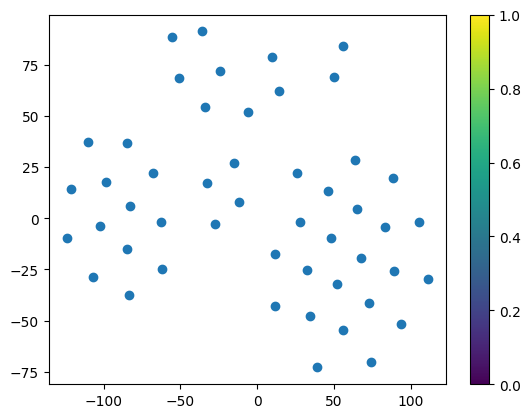

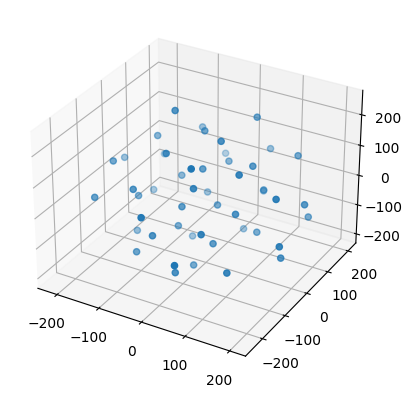

In [39]:
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d


def run_tsne(data, num_dimensions=2, perplexity=30.0, learning_rate=200.0, num_iterations=1000):
    # Create t-SNE object
    tsne = TSNE(n_components=num_dimensions, perplexity=perplexity, learning_rate=learning_rate, n_iter=num_iterations)
    
    # Run t-SNE on the data
    embedded_data = tsne.fit_transform(data)
    
    return embedded_data

def run_tsne3D(data, num_dimensions=3, perplexity=30.0, learning_rate=200.0, num_iterations=1000):
    # Create t-SNE object
    tsne = TSNE(n_components=num_dimensions, perplexity=perplexity, learning_rate=learning_rate, n_iter=num_iterations)
    
    # Run t-SNE on the data
    embedded_data = tsne.fit_transform(data)
    
    return embedded_data

import matplotlib.pyplot as plt

def plot_tsne(embedded_data):
    # Create a scatter plot of the embedded data
    plt.scatter(embedded_data[:, 0], embedded_data[:, 1])
    plt.colorbar()
    plt.show()

    


# Example usage
import numpy as np

# Generate random data
data = np.asarray(model.wv.vectors)

# Run t-SNE
embedded_data = run_tsne(data)

# Print the embedded data

plt = plot_tsne(embedded_data)
ax = plt.axes(projection ="3d")
def plot_tsne3D(embedded_data):
    # Create a scatter plot of the embedded data
    ax.scatter3D(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2])

    plt.show()
    


# Example usage
import numpy as np

# Generate random data
data = np.asarray(model.wv.vectors)
data3d = np.asarray(model.wv.vectors)


# Run t-SNE
embedded_data3d = run_tsne3D(data3d)

# Print the embedded data

plot_tsne3D(embedded_data3d)




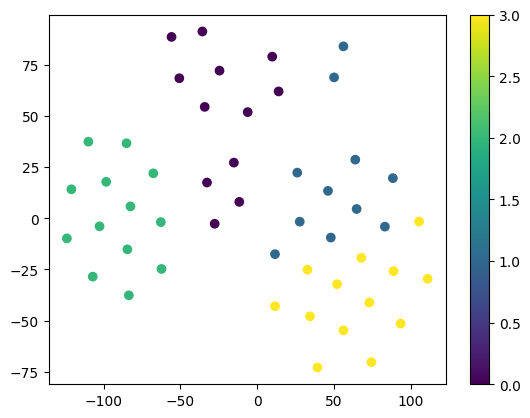

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(embedded_data)


  
cluster_labels = kmeans.labels_
fig, ax = plt.subplots()
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()


# Convert the plot to an interactive HTML format
html_graph = mpld3.fig_to_html(fig)
    
with open('kmeans1.html', 'w') as file:
    file.write(html_graph)

    

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


kmeans2 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)    
kmeans2.fit(embedded_data3d)
trace = go.Scatter3d(x=embedded_data3d[:, 0], y=embedded_data3d[:, 1], z=embedded_data3d[:, 2], mode='markers')
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig2 = go.Figure(data = data, layout = layout)
fig2.show()


    
fig2.write_html('kmeans3d1.html')
